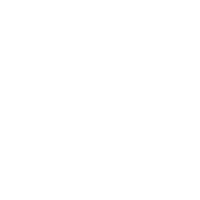

Hello world!

In [1]:
#include <iostream>
int main()
{
  std::cout <<
    R"(<svg xmlns="http://www.w3.org/2000/svg" width="200" height="200" viewBox="0 0 24 24"><path d="M16.111 17.338c-.857.989-1.334 2.79-.709 3.371.596.449 2.201.391 3.385-1.23.86-1.08.569-2.893.081-3.372-.73-.555-1.778.164-2.757 1.243v-.012zm-8.057.3c-.908-1.04-2.088-1.658-2.851-1.199-.51.382-.605 1.685.123 2.967 1.078 1.524 2.596 1.679 3.221 1.307.659-.488.3-2.137-.493-3.075zm4.105 3.145c-1.103-.026-2.798.439-2.776 1.032-.018.403 1.331 1.572 2.705 1.513 1.326.03 2.699-1.139 2.682-1.649-.004-.523-1.498-.927-2.607-.884l-.004-.012zm-.075-13.944c-1.275-.032-2.502.933-2.502 1.493-.004.68 1.008 1.376 2.51 1.394 1.543.01 2.518-.559 2.532-1.26.016-.794-1.394-1.639-2.518-1.627h-.022zm-3.071.532c-2.135-.345-3.913.9-3.842 3.192.07.884 4.63-3.041 3.843-3.177l-.001-.015zm9.749 3.251c.071-2.277-1.709-3.521-3.844-3.176-.787.135 3.772 4.061 3.844 3.176zm.364.824c-1.239-.329-.42 5.049.588 4.615 1.109-.869 1.466-3.446-.588-4.6v-.015zM4.228 16.121c1.007.45 1.827-4.929.589-4.6-2.053 1.153-1.698 3.73-.589 4.615v-.015zm9.415-5.948c-1.146.75-1.354 2.428-.461 3.746.891 1.318 2.543 1.813 3.691 1.078 1.146-.733 1.353-2.412.462-3.746-.892-1.333-2.545-1.813-3.692-1.063v-.015zm-3.096.135c-1.146-.734-2.799-.254-3.689 1.064-.892 1.334-.686 3.012.461 3.761s2.799.269 3.691-1.064c.885-1.318.675-2.997-.465-3.745l.002-.016zm4.369 7.162c-.009-1.393-1.252-2.518-2.781-2.502-1.527.016-2.761 1.139-2.754 2.532v.029c.01 1.394 1.254 2.517 2.783 2.502 1.527 0 2.756-1.138 2.742-2.517v-.029l.01-.015zm3.209-15.133c-2.307 1.184-3.652 2.128-4.389 2.938.377 1.498 2.344 1.558 3.063 1.512-.147-.06-.271-.149-.315-.269.18-.12.821-.016 1.268-.255-.171-.03-.252-.061-.329-.195.419-.135.875-.24 1.141-.465-.143 0-.278.03-.467-.09.377-.194.778-.359 1.095-.658-.196 0-.406 0-.466-.075.346-.21.635-.435.877-.704-.272.045-.39.016-.454-.03.261-.255.593-.479.749-.81-.203.076-.391.09-.522 0 .091-.194.47-.314.69-.779-.215.03-.441.046-.486 0 .098-.389.269-.613.435-.854-.457 0-1.15 0-1.117-.029l.283-.285c-.448-.12-.904.015-1.236.12-.149-.105 0-.255.185-.405-.39.061-.733.135-1.034.256-.164-.15.105-.285.24-.436-.599.12-.839.27-1.094.42-.18-.165-.015-.314.104-.449-.449.164-.674.374-.914.568-.09-.104-.209-.179-.06-.449-.314.18-.554.39-.734.629-.194-.134-.119-.299-.119-.449-.33.27-.54.54-.794.811-.061-.031-.105-.15-.135-.346-.779.75-1.889 2.623-.285 3.356 1.349-1.094 2.981-1.903 4.779-2.503l.041-.075zm-12.259 0c1.798.6 3.419 1.408 4.777 2.518 1.596-.75.493-2.623-.282-3.356-.041.194-.085.329-.135.359-.255-.27-.462-.54-.788-.81 0 .15.077.33-.117.45a2.275 2.275 0 0 0-.725-.63c.149.256.025.33-.056.449-.24-.225-.465-.434-.899-.599.12.149.3.3.12.465-.239-.149-.494-.3-1.078-.42.135.149.404.3.238.45A4.31 4.31 0 0 0 5.886.955c.181.15.342.289.192.405-.345-.12-.806-.255-1.255-.135l.284.284c.03.037-.659.03-1.121.035.165.225.337.449.435.854-.045.045-.27.016-.483 0 .225.449.599.57.688.765-.135.096-.314.075-.523 0 .164.314.494.539.748.81-.074.044-.18.074-.464.037.239.26.524.494.869.704-.06.07-.271.069-.479.075.314.304.719.464 1.094.663-.195.136-.33.105-.465.105.255.225.72.329 1.139.464-.09.135-.164.165-.344.195.449.254 1.078.135 1.258.27-.045.119-.164.209-.314.27.719.045 2.697-.015 3.072-1.514-.736-.807-2.084-1.752-4.391-2.921l.04.016zM7.6.103c.236-.007.436.135.652.201.529-.17.65.063.91.159.577-.12.752.141 1.029.419l.322-.009c.869.507 1.305 1.536 1.457 2.065.152-.529.584-1.559 1.457-2.065l.321.007c.277-.283.453-.539 1.029-.418.261-.105.38-.33.911-.166.33-.104.62-.375 1.057-.045.368-.149.726-.195 1.045.09.495-.06.653.061.774.21.108 0 .809-.104 1.132.36.81-.09 1.064.464.774.988.165.255.337.494-.05.975.15.269.062.553-.27.913.091.374-.074.63-.374.839.06.51-.48.81-.629.914-.061.3-.181.584-.795.734-.089.449-.464.523-.824.614 1.185.675 2.188 1.558 2.188 3.731l.181.299c1.349.809 2.562 3.402.674 5.514-.119.659-.329 1.124-.511 1.648-.269 2.113-2.082 3.101-2.561 3.221-.689.525-1.438 1.02-2.442 1.363-.942.961-1.976 1.336-2.994 1.336h-.092c-1.033 0-2.063-.375-3.012-1.335-1.007-.344-1.754-.838-2.447-1.363-.479-.12-2.283-1.107-2.562-3.221-.187-.524-.394-1.004-.518-1.662-1.894-2.113-.681-4.705.666-5.515l.172-.3c0-2.172 1.005-3.057 2.188-3.73-.359-.09-.72-.165-.823-.615-.615-.15-.735-.434-.795-.734-.15-.105-.689-.404-.629-.928-.3-.211-.465-.465-.375-.854-.314-.346-.404-.645-.27-.915-.39-.479-.209-.733-.045-.974C3.236 1.329 3.491.76 4.3.85 4.614.385 5.32.491 5.423.491c.121-.15.285-.285.779-.225.314-.285.675-.24 1.049-.102.151-.12.286-.164.406-.164L7.6.103z" fill="#fff"/></svg>)"
    "Hello world!";
  return 0;
}

In [1]:
%BC
w = 65
h = 25
x0 = -2.0
x1 = 1.0
y = -1
y1 = 1
dx = (x1 - x0) / w
dy = (y1 - y) / h
max_iter = 50

x0 += .5 * dx
y += .5 * dy

for (i = 0; i != h; ++i) {
  x = x0
  for (j = 0; j != w; ++j) {
    zr = x
    zi = y
    zr2 = zr * zr
    zi2 = zi * zi

    iter = 0

    while ((zr2 + zi2 < 4) && (iter < max_iter)) {
      zi = 2 * zr * zi + y;
      zr = zr2 - zi2 + x;
      zr2 = zr * zr
      zi2 = zi * zi
      iter = ++iter
    }

    if (iter == max_iter) {
      print "#"
    } else {
      print " "
    }
    x += dx
  }
  print "\n"
  y += dy
}

                                                                 
                                        #                        
                                      #####                      
                                      #####                      
                                   #  #######                    
                               ################  ##              
                               ##################                
                             #####################               
                             #######################             
                  # #####  #########################             
                ########## ########################              
                ###################################              
#################################################                
                ###################################              
                ########## ########################              
          

In [1]:
%C
#include <stdio.h>
int main()
{
  printf("Hello world!\n");
  return 0;
}

Hello world!


Note: No ".plot", ".print", or ".fourier" lines; no simulations run


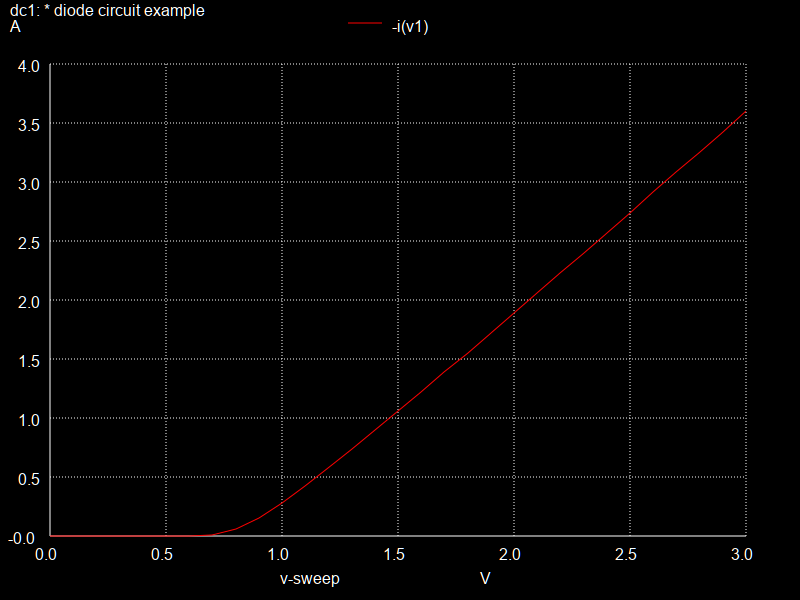

Note: No compatibility mode selected!


Circuit: * diode circuit example

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 31

The file "/dev/stdout" has the Scalable Vector Graphics format.

In [1]:
%NGSPICE
* Diode Circuit Example
V1 in 0 DC 10V
D1 in 0 1N4148
.model 1N4148 D IS=2.52e-9 RS=0.568 N=1.752 CJO=4.86p M=0.379 TT=20.3n

.control
dc V1 0 3 .1
set hcopydevtype=svg hcopywidth=800 hcopyheight=600
hardcopy /dev/stdout -I(V1)
.endc

.end

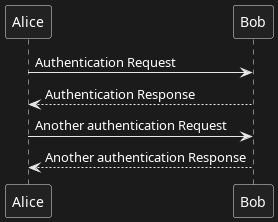

In [1]:
%PUML
@startuml
Alice -> Bob: Authentication Request
Bob --> Alice: Authentication Response

Alice -> Bob: Another authentication Request
Alice <-- Bob: Another authentication Response
@enduml

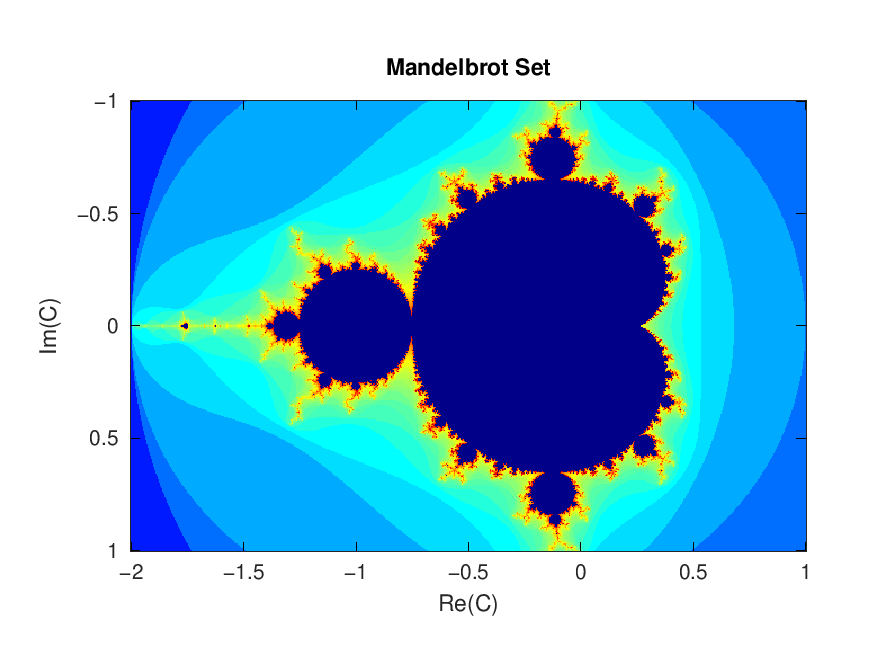

In [1]:
%OCTAVE
% Create a grid of points in the complex plane
x = linspace(-2, 1, 600);
y = linspace(-1, 1, 400);
[X, Y] = meshgrid(x, y);
C = X + Y*1i;

% Initialize the Mandelbrot set array and iteration parameters
M = zeros(size(C));
Z = zeros(size(C));
max_iter = 120;
escape_radius = 2;

% Iterate through the Mandelbrot function for each point
for iter = 1:max_iter
  Z = Z.^2 + C;
  M(abs(Z) > escape_radius & M == 0) = iter;
  Z(abs(Z) > escape_radius) = escape_radius;
end

% Apply logarithmic scaling for better contrast
M_log = log(1 + M);

% Create a colorful plot of the Mandelbrot set
warning('off', 'Octave:gnuplot-graphics');
figure('visible', 'off');
colormap(jet(max_iter));
imagesc(x, y, M_log);
axis image;
xlabel('Re(C)');
ylabel('Im(C)');
title('Mandelbrot Set');

% Save the figure to stdout
temp_filename = [tempname(), '.png'];
saveas(gcf, temp_filename);
disp(fileread(temp_filename));
delete(temp_filename);

In [1]:
%SQLITE3
.param set :w 80
.param set :h 25
WITH RECURSIVE
  xaxis(x)AS(VALUES(-1.3)UNION ALL SELECT x+2.6/:w FROM xaxis WHERE x<1.3),
  yaxis(y)AS(VALUES(-1.15)UNION ALL SELECT y+2.3/:h FROM yaxis WHERE y<1.15),
  m(iter,cx,cy,x,y) AS (
    SELECT 0,x,y,x,y FROM xaxis,yaxis
    UNION ALL
    SELECT iter+1,cx,cy,x*x-y*y+0.0,2.0*x*y-0.8 FROM m
    WHERE(x*x+y*y)<4.0 AND iter<28
  )
  SELECT group_concat(line, x'0a')
  FROM(
    SELECT group_concat(ch, '') AS line
    FROM(
      SELECT cy,substr(' .+*#', 1 + min(max(iter)/7, 4), 1) AS ch FROM m
      GROUP BY cy,cx
      ORDER BY cx
    )
    GROUP BY cy
    ORDER BY cy DESC
  )

                                                                                  
                                         ...                                      
                                      ##*+#..                        ..           
                                       .+*+.......         ..+.   ..**.           
                                       *.+*+###+.....    ...#*+*###*++...         
                                        ......++#+#......#+##*++...##**++*#*..    
                                       ......+++**+....+.+*#*+*.......#+....+.+   
                                    ...++.###++#*+++++**###++...                  
                             ++.*.....++#**++....#++##++...++...                  
                             ...+#....+**++.........*......+#.                    
                             **..+###**#+**+........                              
                               .....+*###+........                                
    